In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./Raw_Data/data_big.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10431 entries, 0 to 10430
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style Number  10431 non-null  object 
 1   Shape         10431 non-null  object 
 2   Carat Weight  10431 non-null  float64
 3   Color         10431 non-null  object 
 4   Clarity       10431 non-null  object 
 5   Graded By     10431 non-null  object 
 6   Cut Grade     10431 non-null  object 
 7   Fluorescence  10272 non-null  object 
 8   Culet         3136 non-null   object 
 9   Depth         10279 non-null  float64
 10  Table         10286 non-null  float64
 11  Girdle        8979 non-null   object 
 12  Polish        10431 non-null  object 
 13  Symmetry      10431 non-null  object 
 14  Measurements  10418 non-null  object 
 15  Price         10431 non-null  int64  
dtypes: float64(3), int64(1), object(12)
memory usage: 1.3+ MB


In [3]:
data.isnull().sum()

Style Number       0
Shape              0
Carat Weight       0
Color              0
Clarity            0
Graded By          0
Cut Grade          0
Fluorescence     159
Culet           7295
Depth            152
Table            145
Girdle          1452
Polish             0
Symmetry           0
Measurements      13
Price              0
dtype: int64

### 1. Thông tin về dữ liệu
    + Shape: Hình dáng của viên kim cương
    + Color: Màu sắc của viên kim cương
    + Clarity: Độ trong của viên kim cương
    + Grade by: Đơn vị chứng nhận cho viên kim cương
    + Cut grade: Lớp cắt của viên kim cương
    + Fluorescence: Sự phát quang của viên kim cương khi gặp tia cực tím
    + Culet: cạnh phẳng nhỏ nhất ở dưới cùng của viên kim cương để bảo vệ phần dưới của viên kim cương
    + Depth: được đo từ culet ở dưới cùng đến mặt bàn lớn ở trên cùng chia cho chiều rộng của viên kim cương
    + Table: mặt phẳng lớn trên đỉnh của một viên kim cương
    + Girdle: đề cập đến cạnh ngoài, hoặc đường viền, hình dạng của viên kim cương
    + Polish: mức độ hoàn thiện của việc đánh bóng
    + Symmetry: tính đối xứng của viên kim cương
    + Measurements: độ dài, độ rộng và độ sâu của viên kim cương (mm)
#### Giá trị dự đoán: Price: giá của viên kim cương

In [5]:
data.head()

,Style Number,Shape,Carat Weight,Color,Clarity,Graded By,Cut Grade,Fluorescence,Culet,Depth,Table,Girdle,Polish,Symmetry,Measurements,Price
0,PCH140_35190,Princess,0.53,J,SI1,GIA,Excellent,None,NaN,NaN,NaN,NaN,Good,Good,4.42 x 4.39 x 3.24 mm,1361
1,SJ-2571_56539,Princess,0.44,I,VVS1,GIA,Excellent,None,NaN,73.2,73.0,Thick to Thick,Excellent,Very Good,4.27 x 4.10 x 3.00 mm,1876
2,GIA 20940_12794,Princess,0.59,D,SI2,GIA,Excellent,None,NaN,72.0,72.0,Medium to Slightly Thick,Excellent,Good,4.73 x 4.69 x 3.38 mm,2198
3,GIA 22341_12794,Princess,0.46,E,VS1,GIA,Excellent,None,NaN,72.1,71.0,Extr. Thin to Very Thick,Very Good,Very Good,4.37 x 4.26 x 3.08 mm,2277
4,SAN/FW-7-22_14255,Princess,0.43,E,VS2,GIA,Excellent,None,None Pointed,70.7,71.0,Slightly Thick to Slightly Thick,Very Good,Very Good,4.25 x 4.16 x 2.94 mm,1477


In [6]:
data.describe()

,Carat Weight,Depth,Table,Price
count,10431.000000,10279.000000,10286.000000,10431.000000
mean,0.676865,65.095730,62.781282,4232.599847
std,0.380103,5.741889,5.974595,11065.408688
min,0.130000,0.600000,30.000000,285.000000
25%,0.460000,61.400000,58.500000,1393.000000
50%,0.550000,64.300000,61.100000,2000.000000
75%,0.810000,68.700000,66.000000,3291.000000
max,8.050000,94.700000,90.000000,622289.000000


<hr>

### 2. Phân bố các đặc trưng trong dữ liệu

#### - Dữ liệu có dạng catagories

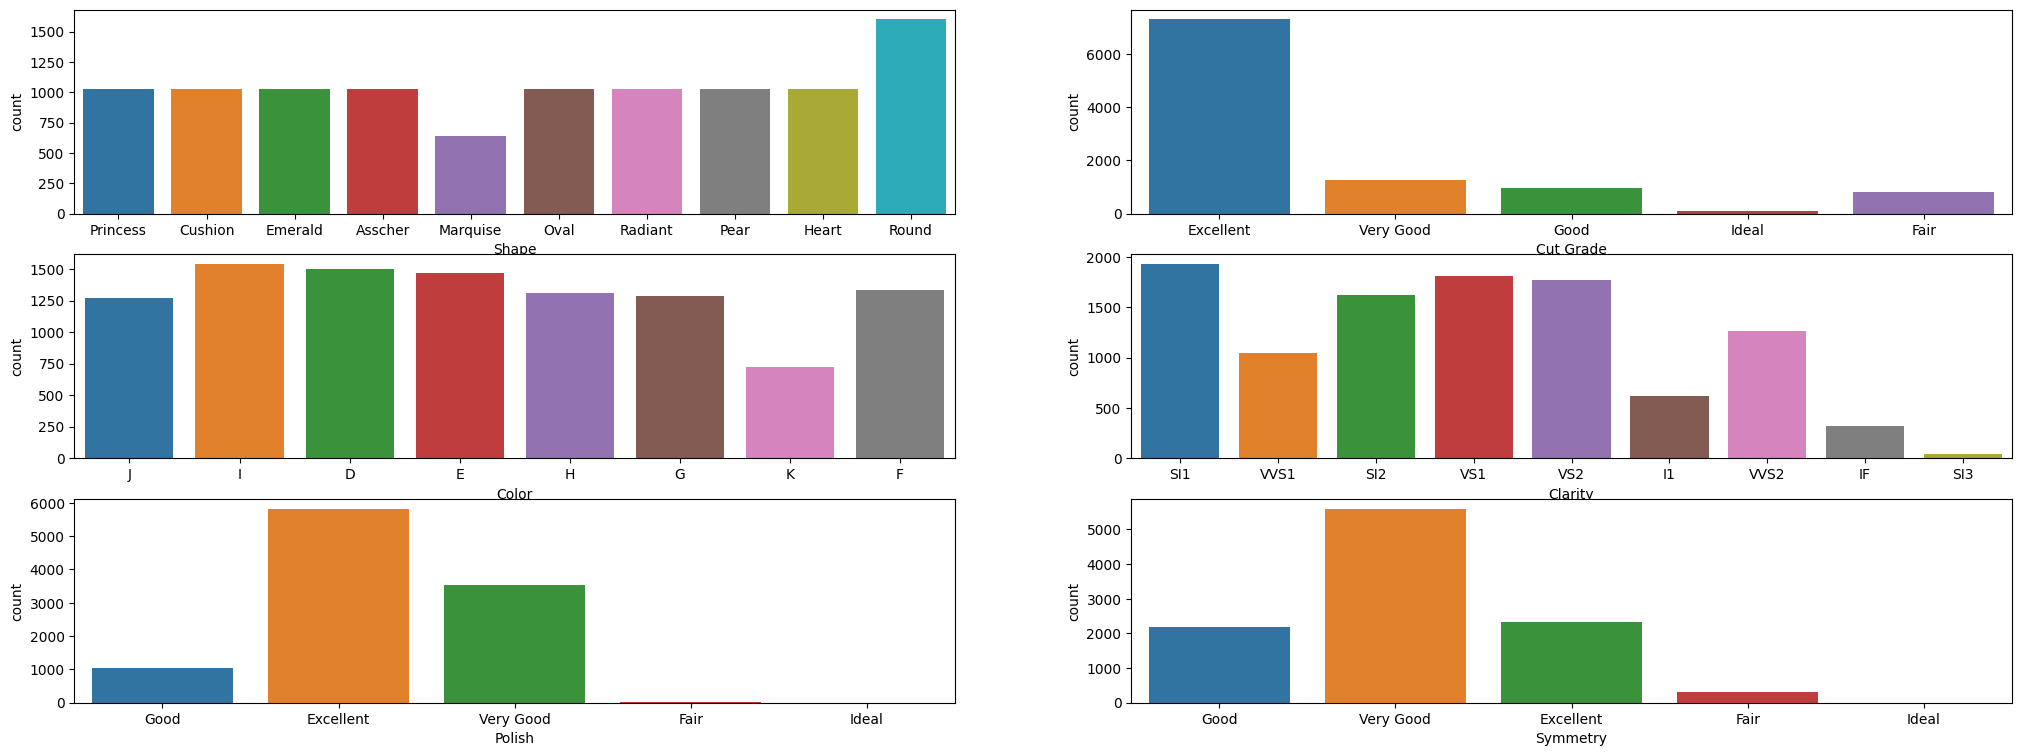

In [7]:
data = pd.read_csv("./Raw_Data/data_big.csv")
figure, ax = plt.subplots(nrows=3,ncols=2, figsize=(25, 9))
cates_str = ['Shape', 'Cut Grade', 'Color', 'Clarity', 'Polish', 'Symmetry']
for i in range(3):
    for j in range(2):
        sns.countplot(data=data, x = cates_str[i * 2 + j], ax=ax[i][j])
plt.show()

##### Nhận xét
    + Shape: số lượng các mẫu khá đồng đều về mặt số lượng. Đổi với dạng là Round thì số lượng lớn hơn và Marquise có số lượng nhỏ nhất do dữ liệu trang web không đủ để lấy so với các loại khác
    + Cut: dữ liệu đa số tập trung tại Excellent và các loại gồm Good, Very Good và Fair có số lượng khá đồng đều. Với loại dữ liệu tốt như Ideal thì số lượng thu được rất ít so với số tổng số lượng mẫu
    + Color: số lượng của từng loại màu sắc có số lượng khá đồng đều nhau. Loại ít nhất là 'K' với số lượng là hơn 800
    + Claritry: các loại đa số đều có số lượng giao động khoảng 1000 mẫu trở lên. Đổi với loại 'SI3' thì số lượng rất thấp so với toàn bộ dữ liệu và loại 'IF' cũng có số lượng khá ít
    + Polish: số lượng mẫu có đặc trưng Excellent chiếm hơn 50% của tổng số dữ liệu, loại 'Good' chiếm hơn 1000 mẫu và Very Good chiểm gần 4000 mẫu. Còn Fair và Ideal thì hiếm khi xuất hiện trong bộ dữ liệu
    + Symmetry: Đa số các mẫu dữ liệu có đặc trưng này là 'Very Good' và chiếm khoảng 60% của tập dữ liệu. 'Excellent' và 'Good' thì chiếm khoảng 20% của dữ liệu và Fair xuất hiện khá ít trong tập dữ liệu, khoảng 500 mẫu

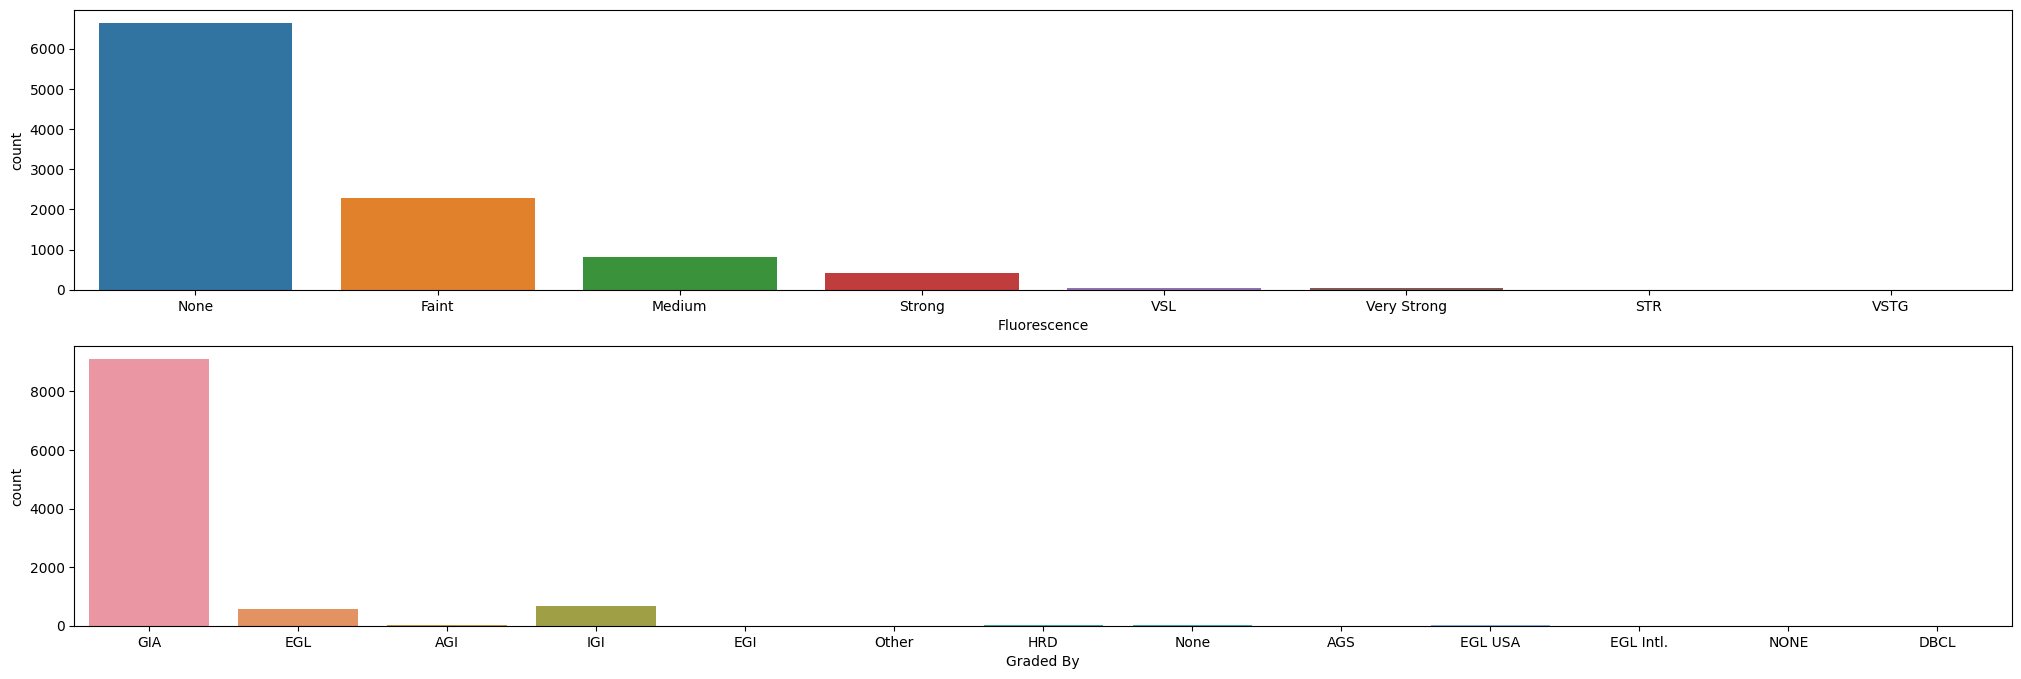

In [8]:
data = pd.read_csv("./Raw_Data/data_big.csv")
figure, ax = plt.subplots(nrows=2, figsize=(25, 8))
cates_str = ['Fluorescence', 'Graded By']
for i in range(2):
    sns.countplot(data=data, x = cates_str[i], ax=ax[i])
plt.show()

##### Nhận xét
    + Fluorescence: Các viên kim cương đa số có kiểu 'None'. Kiểu 'STR' chiếm số lượng rất ít trong tập dữ liệu
    + Graded: Đa số các viên kim cương được kiểm định bởi GIA. Ngoài ra còn có IGI và EGL cũng chiếm số lượng đáng kể trong dữ liệu. Còn các loại khác thì chiếm rất ít trong tập dữ liệu

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'None Pointed'),
  Text(1, 0, 'Very Small Pointed'),
  Text(2, 0, 'NONE'),
  Text(3, 0, 'None'),
  Text(4, 0, 'NON'),
  Text(5, 0, 'Medium'),
  Text(6, 0, 'Slightly Large'),
  Text(7, 0, 'Small'),
  Text(8, 0, 'Large'),
  Text(9, 0, 'Very Small'),
  Text(10, 0, 'LONG'),
  Text(11, 0, 'POINTED'),
  Text(12, 0, '0.0'),
  Text(13, 0, 'VSM'),
  Text(14, 0, 'Medium Pointed'),
  Text(15, 0, 'Small Pointed')])

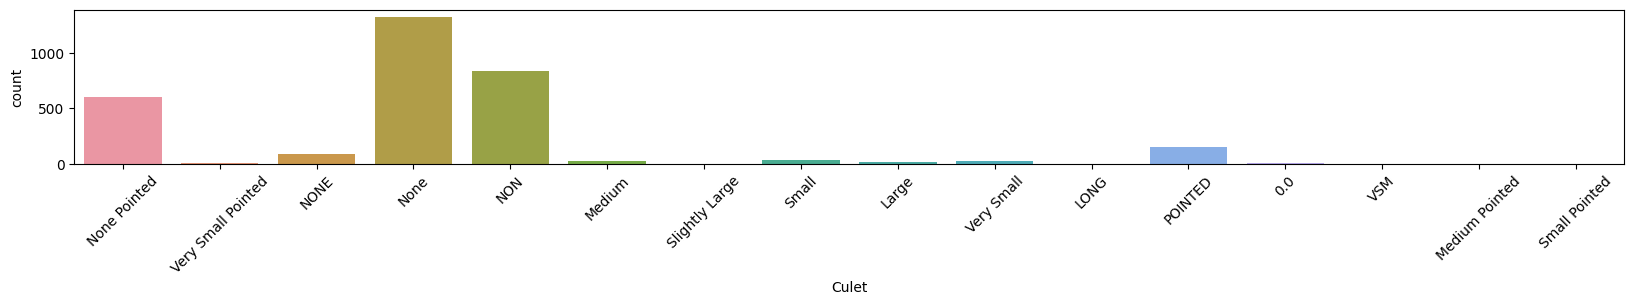

In [9]:
plt.figure(figsize=(20, 2))
sns.countplot(data=data, x = "Culet")
plt.xticks(rotation = 45)

##### Nhận xét
    + Culet

#### - Dữ liệu có dạng số

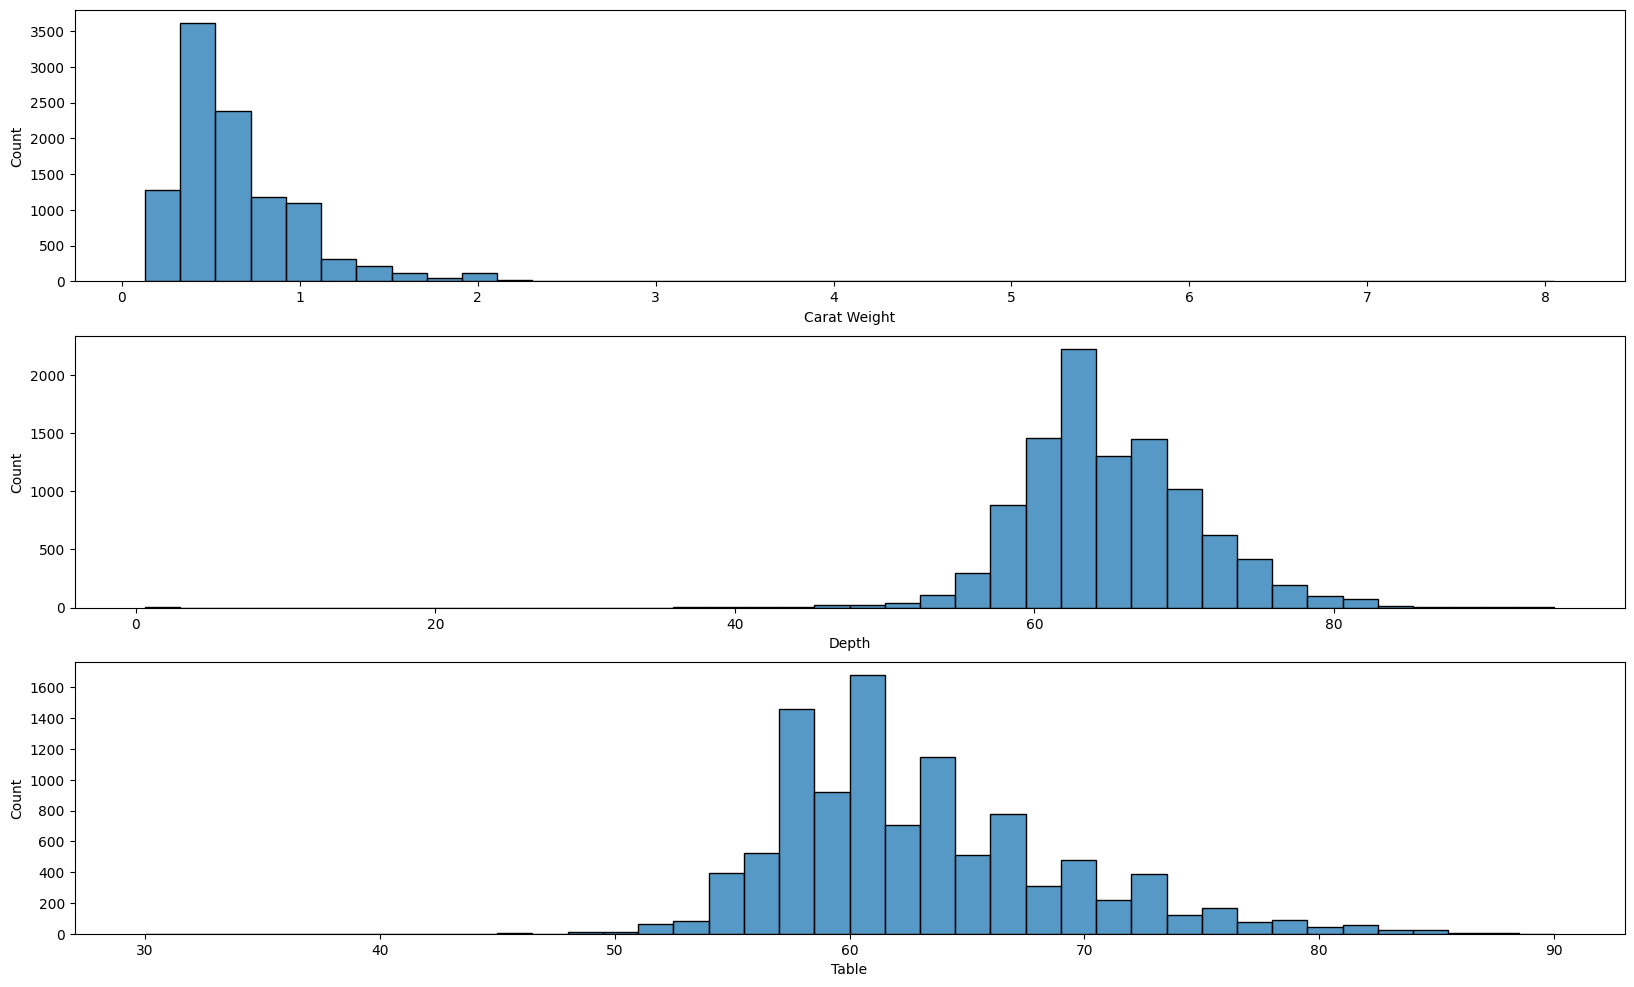

In [10]:
data = pd.read_csv("./Raw_Data/data_big.csv")
figure, ax = plt.subplots(nrows=3, figsize=(20, 12))
cates_num = ['Carat Weight', 'Depth', 'Table']
for i in range(len(ax)):
        sns.histplot(data=data, x = cates_num[i], ax=ax[i], bins = 40)
plt.show()

##### Nhận xét
    + Carat: Dữ liệu đa số phân bố trong khoảng từ 0 tới 1. Ngoài ra có một số viên kim cương có mức carat rất cao. Giá trị cao nhất khoảng 8 carat
    + Depth: Dữ liệu giao phân bố chủ yếu khoảng từ 55% tới 70% và giảm dần khi ra 2 bên
    + Table: Dữ liệu phân bố chủ yếu trong khoảng từ 55% tới 65%